In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 9.15

Suppose that under $H_0$ , a measurement X is $N (0, σ^2 )$, and that under $H_1$ , X
is $N (1, σ^2 )$ and that the prior probability $P(H_0 ) = P(H_1 )$. For σ = 1 and
x ∈ [0, 3], plot and compare (1) the p-value for the test of $H_0$ and (2) $P(H_0 |x)$.
Can the p-value be interpreted as the probability that $H_0$ is true? 

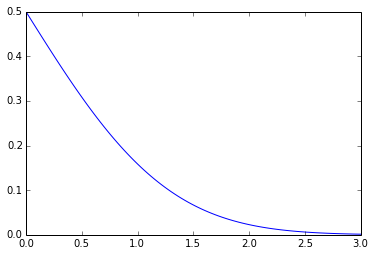

In [2]:
from scipy.stats import norm

x = linspace(0,3,100)
plot(x, 1- norm.cdf(x,0,1));

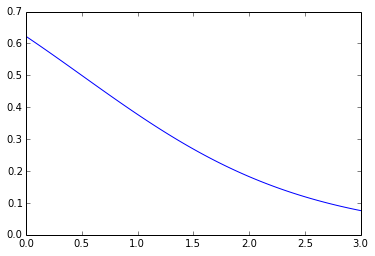

In [3]:
def prob(x,sigma):
    lam = norm.pdf(x,0,sigma)/norm.pdf(x,1,sigma)
    return lam/(1+lam)
plot(x,prob(x,1));

Choose another value of σ and repeat.


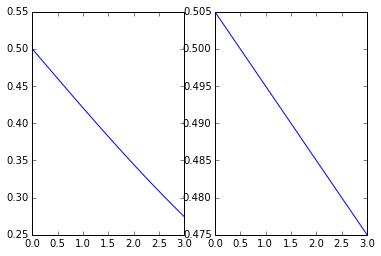

In [4]:
subplot(121)
plot(x, 1- norm.cdf(x,0,5));
subplot(122)
plot(x,prob(x,5));

##9.17

Let $X ∼ N (0, σ^2 )$, and consider testing $H_0$ : $σ_1 = σ_0$ versus $H_A : σ = σ_1$ , where
$σ_1 > σ_0$ . The values $σ_0$ and $σ_1$ are fixed.

a. What is the likelihood ratio as a function of x? What values favor $H_0$ ? What
is the rejection region of a level α test?

$$\Lambda = \frac {\sigma_1}{\sigma_0} \exp [-x^2(\frac 1 {2 \sigma_0^2} - \frac 1 {2 \sigma_1^2})]$$ 

When $x^2$ is small, we favor the null hypothesis. Because $X^2/\sigma_0^2 \sim \chi^2_1$ we write the rejection region as

$$X^2 > \sigma_0^2 \chi^2_1(\alpha)$$

b. For a sample, $X_1 , X_2 , . . . , X_n$ distributed as above, repeat the previous question.

$$\Lambda = \frac {\sigma_1}{\sigma_0} \exp [-\sum X_i^2(\frac 1 {2 \sigma_0^2} - \frac 1 {2 \sigma_1^2})]$$ 

When $\sum X_i^2$ is small, we favor the null hypothesis. Because $\sum X_i^2/\sigma_0^2 \sim \chi^2_1$ we write the rejection region as

$$\sum X_i^2 > \sigma_0^2 \chi^2_1(\alpha)$$

c. Is the test in the previous question uniformly most powerful for testing
$H_0 : σ = σ_0$ versus $H_1 : σ > σ_0$ ?

Yes.

##9.18

Let $X_1 , X_2 , . . . , X_n$ be i.i.d. random variables from a double exponential distri-
bution with density $f (x) = \frac 1 2 λ \exp(−λ|x|)$. Derive a likelihood ratio test of the
hypothesis $H_0 : λ = λ_0$ versus $H_1 : λ = λ_1$ , where $λ_0$ and $λ_1 > λ_0$ are specified
numbers. Is the test uniformly most powerful against the alternative $H_1 : λ > λ_0$ ?

$$\Lambda = \frac {λ_0} {λ_1} \exp (-|x|(λ_0 -λ_1))$$

Yes, the test is uniformly most powerful.

##9.22

In Example A of Section 8.5.3 a confidence interval for the variance of a normal
distribution was derived. Use Theorem B of Section 9.3 to derive an acceptance
region for testing the hypothesis $H_0 : σ^2 = σ_0^2$ at the significance level α based on
a sample $X_1 , X_2 , . . . , X_n$ . Precisely describe the rejection region if $σ_0 = 1$, n =
15, α = .05.

From Example A, we have an acceptance region:

$$\left[\frac {n \sigma_0^2}{\chi_{n-1}^2(1 -\alpha/2) }, \frac {n \sigma_0^2}{\chi_{n-1}^2(\alpha/2) }\right]$$

In [30]:
from scipy.stats import chi2
print(15/chi2.ppf(0.975,15), 15/chi2.ppf(.025,15))

0.545684866864 2.39534812087


And the rejection region is anything that lies outside of the acceptance region.

##9.25

Calculate the likelihood ratio for Example B of Section 9.5 and compare the
results of a test based on the likelihood ratio to those of one based on Pearson’s
chi-square statistic.

In [71]:
num = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 19]
freq = [56, 104, 80, 62, 42, 27, 9, 9, 5, 3, 2, 1]
n = sum(freq)
out = 0
for i in range(len(num)):
    out += num[i]*freq[i]
lam = out/n    
from scipy.stats import poisson
observed = [56, 104, 80, 62, 42, 27, 9, 20]
expected = n*poisson.pmf(range(8), lam)
expected[7] = (n*(1-poisson.cdf(6,lam)))
print(sum((observed - expected)**2/(expected)))
2*sum(observed*np.log(observed/expected))

estimated lambda 2.44
74.9460474698


54.618714881854011

In [84]:
chi2.ppf(1 -0.005,6)

18.547584178511087

While both tests reject the null hypothesis. We see that Pearson's rejects at about $−2 \log \Lambda = 75$. But the likelihood ratio rejcts at about $−2 \log \Lambda = 55$

##9.26

True or false:

a. The generalized likelihood ratio statistic is always less than or equal to 1.

True

b. If the p-value is .03, the corresponding test will reject at the significance
level .02.

False

c. If a test rejects at significance level .06, then the p-value is less than or equal
to .06.

True

d. The p-value of a test is the probability that the null hypothesis is correct.

True

e. In testing a simple versus simple hypothesis via the likelihood ratio, the
p-value equals the likelihood ratio.

False

f. If a chi-square test statistic with 4 degrees of freedom has a value of 8.5, the
p-value is less than .05.

False, I get 0.07488723


##9.28

Suppose that a test statistic T has a standard normal null distribution.

a. If the test rejects for large values of |T |, what is the p-value corresponding to
T = 1.50?

In [5]:
(1 - norm.cdf(1.5))*2

0.13361440253771617

b. Answer the same question if the test rejects for large T .

In [6]:
(1 - norm.cdf(1.5))

0.066807201268858085

##9.34

Test the goodness of fit of the data to the genetic model given in Problem 55 of
Chapter 8.

<table>
<tr><td>Starchy green</td><td>1997</td></tr>
<tr><td>Starchy white</td><td>906</td></tr>
<tr><td>Sugary green</td><td>904</td></tr>
<tr><td>Sugary white</td><td>32</td></tr>
</table>

From my homework last quarter, I found:

$$\theta_0 = 0.035712302240628144$$

Therefore, we have the following expected frequencies:

In [85]:
theta = 0.035712302240628144
observed = array([1997,906,904,32])
probs = array([0.25*(2+theta), 0.25*(1-theta), 0.25*(1- theta), 0.25*theta])
total = sum(observed)
expected = total*probs
print(sum((observed - expected)**2/(expected)))
2*sum(observed*np.log(observed/expected))

2.0154358502


2.0187213933664472

In [90]:
chi2.pdf(2.02,2)

0.18210948978576169

We therefore accept the null hypothesis with the p-value 0.18$

##9.41

Let $X_i ∼ bin(n_i , p_i )$, for i = 1, . . . , m, be independent. Derive a likelihood ratio
test for the hypothesis

$$H_0 : p_1 = p_2 = · · · = p_m$$

against the alternative hypothesis that the $p_i$ are not all equal. What is the large-
sample distribution of the test statistic?

Let $\hat{p_0} = \sum X_i / \sum n_i$ and $\hat{p}_i = X_i/ n_i$. Then

$$\Lambda = \frac {\prod \hat{p_0}^{n_i \hat{p}_i}(1 -\hat{p_0})^{n_i -  n_i \hat{p}_i}   }
{\prod \hat{p_i}^{n_i \hat{p}_i}(1 -\hat{p_i})^{n_i -  n_i \hat{p}_i}}$$

Following the book's example of a taylor expansion, we have

$$\log(\Lambda) = \sum [n_i \hat{p}_i \log( \hat{p_0}) + (n_i -  n_i \hat{p}_i) \log (1 -\hat{p_0})-n_i \hat{p}_i \log( \hat{p_i}) - (n_i -  n_i \hat{p}_i) \log (1 -\hat{p_i})]$$

Only the second derivative contributes in the taylor expansion, and therefore:

$$-2 \log (\Lambda) \approx  \sum \frac {n_i ( \hat{p}_i - \hat{p}_0)}{(1-\hat{p}_0) \hat{p}_0}$$





##9.53

Hoaglin (1980) suggested a “Poissonness plot”—a simple visual method for
assessing goodness of fit. The expected frequencies for a sample of size n from a Poisson distribution are

$$E_k = n P(X = k) = ne^{−λ}\frac {λ^k}{k!}$$

or

$$log E_k = log n − λ + k log λ − log k!$$

Thus, a plot of $log(O_k ) + log k!$ versus k should yield nearly a straight line with
a slope of log λ and an intercept of log n − λ. Construct such plots for the data
of Problems 1, 2, and 3 of Chapter 8. Comment on how straight they are.

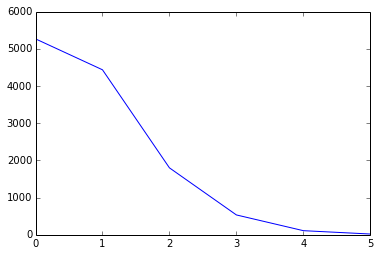

In [92]:
problem_1_observed = array([5267,4436,1800,534,111,21])
problem_1_k = array(range(6))
plot(problem_1_k, problem_1_observed);

I wouldn't classify this as very straight.

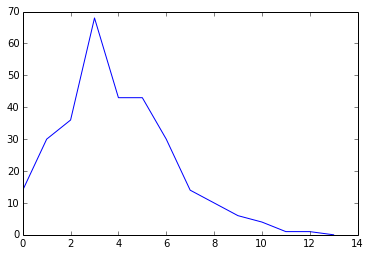

In [93]:
problem_2_observed = array([14,30,36,68,43,43,30,14,10,6,4,1,1,0])
problem_2_k = array(range(14))
plot(problem_2_k, problem_2_observed);

Well... this one is even less straight than the one before.

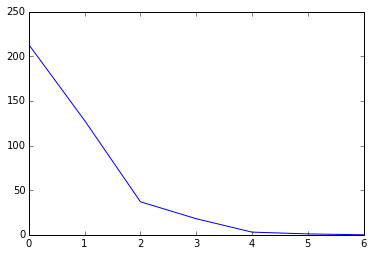

In [95]:
problem_3_observed = array([213,128,37,18,3,1,0])
problem_3_k = array(range(7))
plot(problem_3_k, problem_3_observed);

This one again, is not very straight, but certainly better than the last one.